# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [221]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import datetime in order to label with current date
import datetime
d = datetime.datetime.today()
date = f"{d.year}-{d.month}-{d.day}" 

### Generate the Cities List by Using the `citipy` Library

In [222]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [223]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append city information
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pitimbu
Processing Record 2 of Set 1 | tsabong
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | samarinda
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | mettur
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | santa rosa
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 

Processing Record 37 of Set 4 | godda
Processing Record 38 of Set 4 | shchelyayur
City not found. Skipping...
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | imbituba
Processing Record 42 of Set 4 | yar-sale
Processing Record 43 of Set 4 | ngunguru
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | pangody
Processing Record 48 of Set 4 | bahia blanca
Processing Record 49 of Set 4 | swan hill
Processing Record 0 of Set 5 | faridpur
Processing Record 1 of Set 5 | bodden town
Processing Record 2 of Set 5 | leua
Processing Record 3 of Set 5 | banepa
Processing Record 4 of Set 5 | tsentralnyy
City not found. Skipping...
Processing Record 5 of Set 5 | machali
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | linxia
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | kota tinggi
Proce

Processing Record 29 of Set 8 | chokurdakh
Processing Record 30 of Set 8 | santa maria
Processing Record 31 of Set 8 | balakhta
Processing Record 32 of Set 8 | russell
Processing Record 33 of Set 8 | bud
Processing Record 34 of Set 8 | kaitangata
Processing Record 35 of Set 8 | shetpe
Processing Record 36 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 8 | vavoua
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | kurilsk
Processing Record 40 of Set 8 | taihe
Processing Record 41 of Set 8 | maldonado
Processing Record 42 of Set 8 | cangucu
Processing Record 43 of Set 8 | maceio
Processing Record 44 of Set 8 | charlestown
Processing Record 45 of Set 8 | jobner
Processing Record 46 of Set 8 | talas
Processing Record 47 of Set 8 | burns lake
Processing Record 48 of Set 8 | cordoba
Processing Record 49 of Set 8 | buritizeiro
Processing Record 0 of Set 9 | north bend
Processing Record 1 of Set 9 | istmina
Processing Record 2 of Set 9 | 

Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | kamenka
Processing Record 20 of Set 12 | fujin
Processing Record 21 of Set 12 | almenara
Processing Record 22 of Set 12 | troitskoye
Processing Record 23 of Set 12 | myitkyina
Processing Record 24 of Set 12 | tucurui
Processing Record 25 of Set 12 | mbabane
Processing Record 26 of Set 12 | adeje
Processing Record 27 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 28 of Set 12 | lakes entrance
Processing Record 29 of Set 12 | batemans bay
Processing Record 30 of Set 12 | black river
Processing Record 31 of Set 12 | ichchapuram
Processing Record 32 of Set 12 | plettenberg bay
Processing Record 33 of Set 12 | tateyama
Processing Record 34 of Set 12 | along
Processing Record 35 of Set 12 | salalah
Processing Record 36 of Set 12 | paragominas
Processing Record 37 of Set 12 | mount gambier
Processing Record 38 of Set 12 | yomitan
City not found. Skipping...
Processing Record 39 of Set 12 | wasilla

In [224]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [225]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pitimbu,-7.4706,-34.8086,79.39,78,12,11.74,BR,1670193717
1,tsabong,-26.0217,22.4010,78.40,15,67,22.06,BW,1670193717
2,bredasdorp,-34.5322,20.0403,57.11,71,86,3.42,ZA,1670193717
3,talnakh,69.4865,88.3972,20.21,96,100,7.05,RU,1670193718
4,severo-kurilsk,50.6789,156.1250,24.15,63,76,18.07,RU,1670193718


In [226]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [227]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pitimbu,-7.4706,-34.8086,79.39,78,12,11.74,BR,1670193717
1,tsabong,-26.0217,22.4010,78.40,15,67,22.06,BW,1670193717
2,bredasdorp,-34.5322,20.0403,57.11,71,86,3.42,ZA,1670193717
3,talnakh,69.4865,88.3972,20.21,96,100,7.05,RU,1670193718
4,severo-kurilsk,50.6789,156.1250,24.15,63,76,18.07,RU,1670193718


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

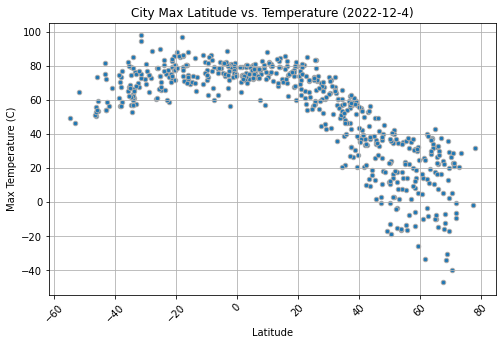

In [228]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat', 'Max Temp', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

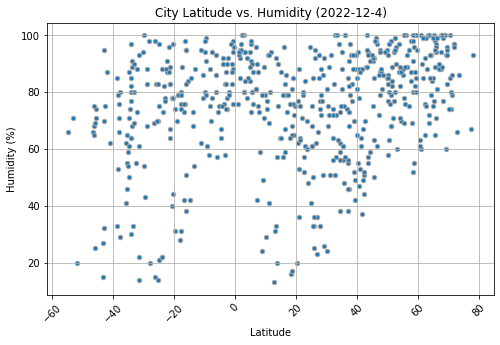

In [229]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

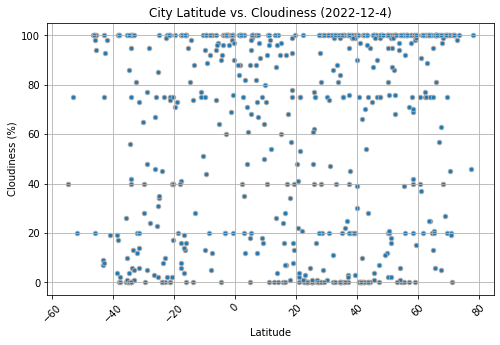

In [230]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

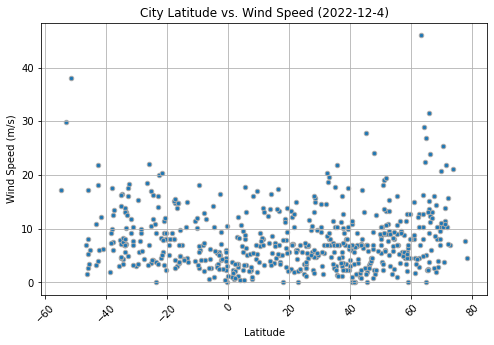

In [231]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [232]:
# Define a function to create Linear Regression plots
def regressionplot (x, y):
    
    # Correlation calculation
    correlation = st.pearsonr(x,y)
    
    # Display correlation result
    print(f"The r- value is: {round(correlation[0],2)}.")
    
    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot with linear regression line
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-",label=line_eq.format(slope,intercept))
    
    # Add legend
    plt.legend()



In [233]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,talnakh,69.4865,88.3972,20.21,96,100,7.05,RU,1670193718
4,severo-kurilsk,50.6789,156.1250,24.15,63,76,18.07,RU,1670193718
11,butaritari,3.0707,172.7902,80.46,80,35,12.15,KI,1670193721
12,mettur,11.8000,77.8000,70.72,94,54,3.22,IN,1670193722
13,tasiilaq,65.6145,-37.6368,26.76,65,6,3.76,GL,1670193722


In [234]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pitimbu,-7.4706,-34.8086,79.39,78,12,11.74,BR,1670193717
1,tsabong,-26.0217,22.4010,78.40,15,67,22.06,BW,1670193717
2,bredasdorp,-34.5322,20.0403,57.11,71,86,3.42,ZA,1670193717
5,cape town,-33.9258,18.4232,63.27,64,0,13.80,ZA,1670193719
6,punta arenas,-53.1500,-70.9167,46.51,71,75,29.93,CL,1670193719


###  Temperature vs. Latitude Linear Regression Plot

The r- value is: -0.84.


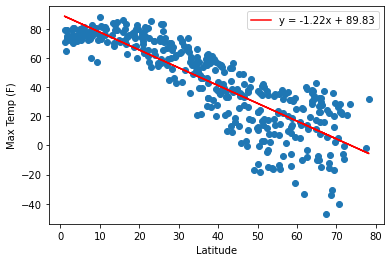

In [235]:
# Linear regression on Northern Hemisphere
line_eq = regressionplot(x = northern_hemi_df['Lat'], y = northern_hemi_df['Max Temp'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Display
plt.show()


The r- value is: 0.5.


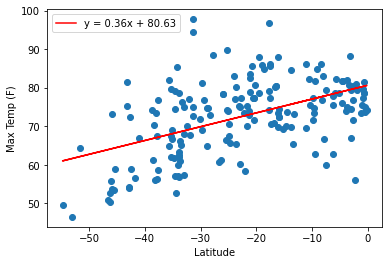

In [236]:
# Linear regression on Southern Hemisphere
line_eq = regressionplot(x = southern_hemi_df['Lat'], y = southern_hemi_df['Max Temp'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Display
plt.show()


### Discussion about the linear relationship:

* These linear regressions reflect the relationships between latitudes and temperatures in the northern and southern hemispheres. Based on the 'r' values, we can conclude there is a correlation with regard to max temperatures and the equator. The results show that the closer to the equator (latitude and longitude 0), the max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r- value is: 0.26.


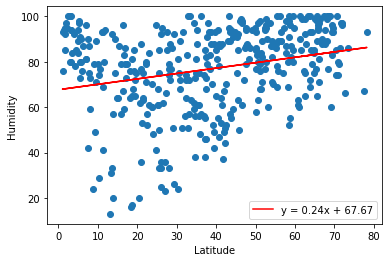

In [237]:
# Northern Hemisphere
line_eq = regressionplot(x = northern_hemi_df['Lat'], y = northern_hemi_df['Humidity'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Display
plt.show()

The r- value is: 0.34.


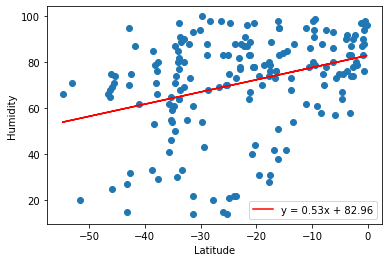

In [238]:
# Southern Hemisphere
line_eq = regressionplot(x = southern_hemi_df['Lat'], y = southern_hemi_df['Humidity'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Display
plt.show()

### Discussion about the linear relationship:

* The above two linear regressions model the relationships between latitudes and humidity levels in the northern and southern hemispheres. Though the 'r' value is positive for both hemispheres, there is not a significant enough relationship to uncover any findings.


### Cloudiness vs. Latitude Linear Regression Plot

The r- value is: 0.15.


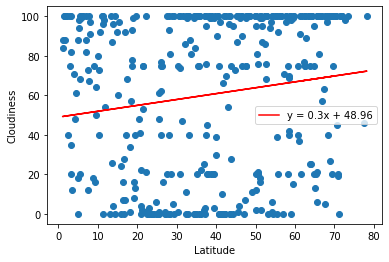

In [239]:
# Northern Hemisphere
line_eq = regressionplot(x = northern_hemi_df['Lat'], y = northern_hemi_df['Cloudiness'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Display
plt.show()

The r- value is: 0.26.


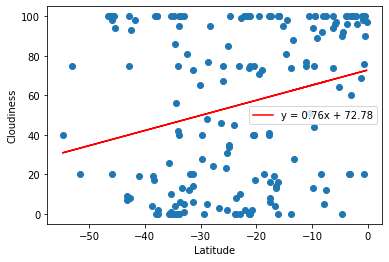

In [240]:
# Southern Hemisphere
line_eq = regressionplot(x = southern_hemi_df['Lat'], y = southern_hemi_df['Cloudiness'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Display
plt.show()

### Discussion about the linear relationship:
    
* The above two linear regressions model the relationships between latitudes and cloudiness. The 'r' values are quite close to one another and indicating that there is not
a strong relationship here. 

### Wind Speed vs. Latitude Linear Regression Plot

The r- value is: 0.24.


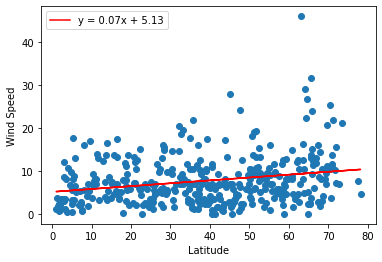

In [241]:
# Northern Hemisphere
line_eq = regressionplot(x = northern_hemi_df['Lat'], y = northern_hemi_df['Wind Speed'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Display
plt.show()

The r- value is: -0.34.


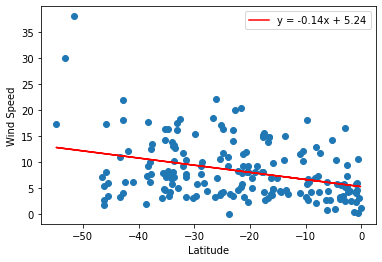

In [242]:
# Southern Hemisphere
line_eq = regressionplot(x = southern_hemi_df['Lat'], y = southern_hemi_df['Wind Speed'])

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Display
plt.show()

### Discussion about the linear relationship:
* The linear regression modeling the relationships between wind speeds and latitudes. The r- value for the southern hemisphere indicates that the further away from the equator, the more windy it will be.